In [1]:
import skbio
#from skbio import TreeNode, DistanceMatrix, Alignment
from skbio import TreeNode, DistanceMatrix, TabularMSA, DNA
#import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import hamming

%matplotlib inline

In [2]:
aln = TabularMSA.read("../data/all_genomes-0.01.fasta", constructor=DNA)
aln.reassign_index(minter="id")

In [3]:
dist = DistanceMatrix.from_iterable(
    [seq.values for seq in aln], metric=hamming, keys=aln.index)

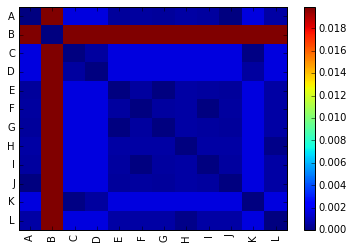

In [4]:
dist

In [5]:
1/dist['G']["ABCDEFGHIJKL".index("F")]

1626.9877989263055

In [6]:
samp = skbio.read("../data/sample.nwk", into=TreeNode)

In [7]:
tdist = samp.tip_tip_distances()

In [93]:
num_runs = 3
runs = DistanceMatrix(
    np.repeat(np.repeat(dist.data,num_runs, axis=1), num_runs, axis=0))
runs.ids = ['{}-{}'.format(g, i) for g in dist.ids for i in range(num_runs)]
runs.write("../data/runs.dist")

'../data/runs.dist'

In [101]:
truth = runs.condensed_form()

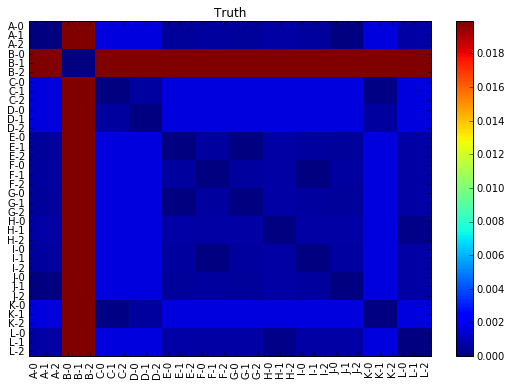

In [102]:
f=runs.plot(title="Truth")
f.set_size_inches(9, 6)
f.savefig("Truth-mat.png")

In [103]:
kwip_mat = DistanceMatrix.read("../data/kwip/30x-0.01-wip.dist")

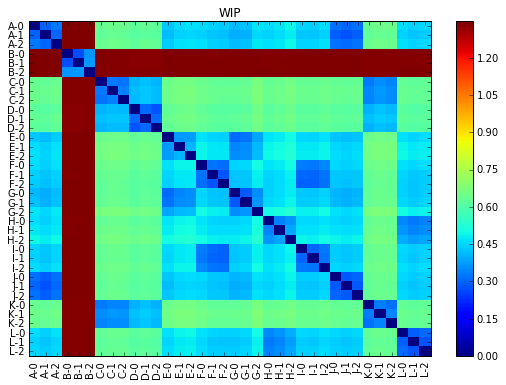

In [104]:
f=kwip_mat.plot(title="WIP")
f.set_size_inches(9, 6)
f.savefig("WIP-mat.png")

In [105]:
ip_mat = DistanceMatrix.read("../data/kwip/30x-0.01-ip.dist")

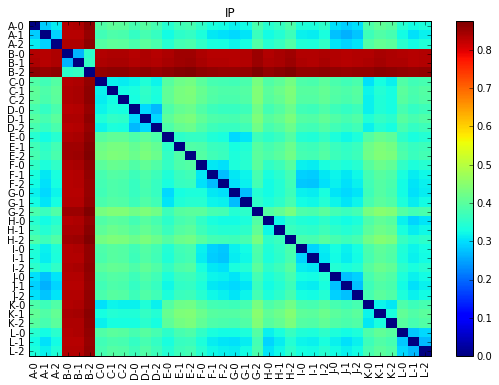

In [106]:
f=ip_mat.plot(title="IP")
f.set_size_inches(9,6)
f.savefig("IP-mat.png")

In [107]:
wip = kwip_mat.condensed_form()
ip = ip_mat.condensed_form()

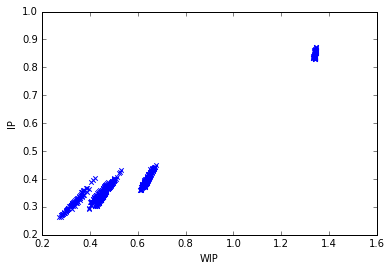

In [108]:
fig, ax = plt.subplots()
ax.scatter(wip, ip, marker='x')
ax.set_ylabel('IP')
ax.set_xlabel('WIP')

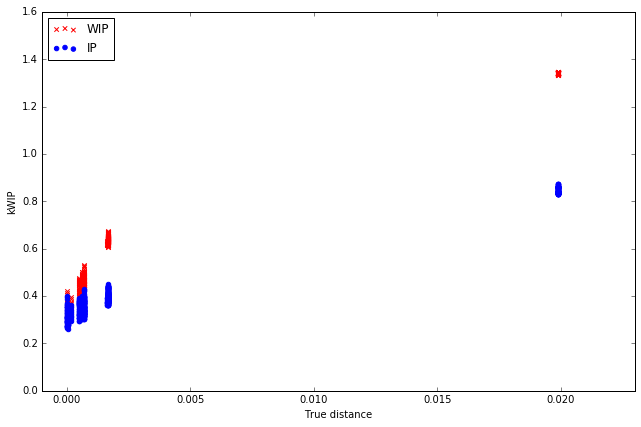

In [109]:
fig, ax = plt.subplots(figsize=(9,6))
w = ax.scatter(truth, wip, marker='x', color='r', label='WIP')
i = ax.scatter(truth, ip, marker='o', color='b', label='IP')
ax.set_xlabel("True distance")
ax.set_ylabel("kWIP")
ax.set_xlim(-0.001,0.023)
ax.legend(handles=[w, i], loc='upper left')
fig.tight_layout()

In [74]:
fig.savefig("WIPvsIPvsTruth.png")

In [27]:
import scipy as sp

In [28]:
sp.stats.spearmanr(truth, wip)

SpearmanrResult(correlation=0.94972113146811221, pvalue=6.4792756926912754e-319)

In [29]:
sp.stats.spearmanr(truth, ip)

SpearmanrResult(correlation=0.85767848876847097, pvalue=1.4220682517704017e-183)

In [30]:
X = sm.add_constant(ip)
o = sm.OLS(wip, X)
f = o.fit()
print(f.rsquared_adj, f.ssr)

NameError: name 'sm' is not defined

In [ ]:
def regress(y):
    X = sm.add_constant(truth)
    o = sm.OLS(y, X)
    f = o.fit()
    return f

In [ ]:
wip_fit = regress(wip)
print(wip_fit.rsquared_adj, wip_fit.ssr)
_ =sm.graphics.plot_ccpr_grid(wip_fit)

In [ ]:
ip_fit = regress(ip)
print(ip_fit.rsquared_adj, ip_fit.ssr)
_ =sm.graphics.plot_ccpr_grid(ip_fit)